# Milestone 2

In [1]:
%load_ext autoreload
%autoreload 2
%cd ../

C:\Users\RHabe\Documents\NLP\project-team14


In [2]:
!pip install torchtext==0.6.0
!pip install lime
!pip install spacy

**We use torchtext version 0.6 because its the last version that is supported in python 3.10 that also includes Fields and LabelFields. We wanted to change it to the newer torchtext functions and classes but we ran into multiple issues so we decided to stick with version 0.6 for now. we will try to change it for the next milestone**

In [3]:
import torchtext
print("TorchText Version : {}".format(torchtext.__version__))

C:\Users\RHabe\Anaconda3\envs\tuwnlpie\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TorchText Version : 0.6.0


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RHabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RHabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RHabe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\RHabe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
#from tuwnlpie.milestone2.utils import TreatDiseaseDataset not used anymore because of package version conflict 
from tuwnlpie.milestone2.model import RNNClassifier
from tuwnlpie.milestone2.utils import TrainModel,EvaluatePerformance,get_loaders_lstm, prepare_dataset_lstm
import torch
from torch.optim import Adam

# Prepare dataset for RNN and LSTM models

In [6]:
torch.manual_seed(1234)

In [7]:
# run this to prepare dataset for training with lstm and create train, valid and test csv files in data
prepare_dataset_lstm()

In [8]:
# loaders for dataset, transformed into the format for torch usage
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size=32
train_loader, valid_loader, test_loader, vocab_length = get_loaders_lstm(batch_size=batch_size, device=device)

## Approach 1: Single RNN Layer

In [9]:
embed_len = 50
hidden_dim = 50
n_layers=1
target_classes = ["cause", "treat", "neutral"]
rnn_classifier = RNNClassifier(embed_len,hidden_dim,n_layers,target_classes,vocab_length)
rnn_classifier

RNNClassifier(
  (embedding_layer): Embedding(588, 50)
  (rnn): RNN(50, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)

In [10]:
epochs = 15
learning_rate = 0.01
optimizer = Adam(rnn_classifier.parameters(), lr=learning_rate)

TrainModel(rnn_classifier, optimizer, train_loader, test_loader, epochs)

Train Loss : 1.024
Valid Loss : 1.177
Valid Acc  : 0.533
Train Loss : 1.067
Valid Loss : 1.034
Valid Acc  : 0.557
Train Loss : 0.869
Valid Loss : 1.070
Valid Acc  : 0.525
Train Loss : 0.704
Valid Loss : 1.200
Valid Acc  : 0.443
Train Loss : 0.561
Valid Loss : 1.219
Valid Acc  : 0.492
Train Loss : 0.392
Valid Loss : 1.423
Valid Acc  : 0.393
Train Loss : 0.248
Valid Loss : 1.951
Valid Acc  : 0.410
Train Loss : 0.327
Valid Loss : 1.789
Valid Acc  : 0.369
Train Loss : 0.431
Valid Loss : 1.423
Valid Acc  : 0.525
Train Loss : 0.521
Valid Loss : 1.402
Valid Acc  : 0.426
Train Loss : 0.364
Valid Loss : 1.466
Valid Acc  : 0.492
Train Loss : 0.342
Valid Loss : 2.191
Valid Acc  : 0.369
Train Loss : 0.217
Valid Loss : 2.112
Valid Acc  : 0.443
Train Loss : 0.357
Valid Loss : 1.796
Valid Acc  : 0.352
Train Loss : 0.363
Valid Loss : 1.336
Valid Acc  : 0.475


In [11]:
EvaluatePerformance(rnn_classifier, test_loader,target_classes)

Test Accuracy : 0.48360655737704916

Classification Report : 
              precision    recall  f1-score   support

       cause       0.13      0.07      0.09        28
       treat       0.54      0.85      0.66        65
     neutral       0.33      0.07      0.11        29

    accuracy                           0.48       122
   macro avg       0.34      0.33      0.29       122
weighted avg       0.40      0.48      0.40       122


Confusion Matrix : 
[[ 2 23  3]
 [ 9 55  1]
 [ 4 23  2]]


## Approach 2: Multiple RNN Layers

In [12]:
embed_len = 20
hidden_dim = 50
n_layers=3

rnn_classifier = RNNClassifier(embed_len,hidden_dim,n_layers,target_classes,vocab_length)
rnn_classifier

RNNClassifier(
  (embedding_layer): Embedding(588, 20)
  (rnn): RNN(20, 50, num_layers=3, batch_first=True)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)

In [13]:
epochs = 15
learning_rate = 1e-3
optimizer = Adam(rnn_classifier.parameters(), lr=learning_rate)

TrainModel(rnn_classifier, optimizer, train_loader, test_loader, epochs)

Train Loss : 1.007
Valid Loss : 1.045
Valid Acc  : 0.533
Train Loss : 1.020
Valid Loss : 1.010
Valid Acc  : 0.541
Train Loss : 0.939
Valid Loss : 1.028
Valid Acc  : 0.516
Train Loss : 0.910
Valid Loss : 1.051
Valid Acc  : 0.508
Train Loss : 0.869
Valid Loss : 1.102
Valid Acc  : 0.508
Train Loss : 0.806
Valid Loss : 1.199
Valid Acc  : 0.500
Train Loss : 0.762
Valid Loss : 1.209
Valid Acc  : 0.475
Train Loss : 0.705
Valid Loss : 1.277
Valid Acc  : 0.467
Train Loss : 0.633
Valid Loss : 1.355
Valid Acc  : 0.475
Train Loss : 0.619
Valid Loss : 1.393
Valid Acc  : 0.467
Train Loss : 0.535
Valid Loss : 1.422
Valid Acc  : 0.484
Train Loss : 0.505
Valid Loss : 1.507
Valid Acc  : 0.475
Train Loss : 0.533
Valid Loss : 1.490
Valid Acc  : 0.434
Train Loss : 0.482
Valid Loss : 1.455
Valid Acc  : 0.451
Train Loss : 0.420
Valid Loss : 1.478
Valid Acc  : 0.451


In [14]:
EvaluatePerformance(rnn_classifier, test_loader,target_classes)

Test Accuracy : 0.4672131147540984

Classification Report : 
              precision    recall  f1-score   support

       cause       0.26      0.25      0.25        28
       treat       0.58      0.65      0.61        65
     neutral       0.36      0.28      0.31        29

    accuracy                           0.47       122
   macro avg       0.40      0.39      0.39       122
weighted avg       0.45      0.47      0.46       122


Confusion Matrix : 
[[ 7 17  4]
 [13 42 10]
 [ 7 14  8]]


## Approach 3: Stacking Multiple RNN Layers (Tokens Per Text Example=15, Embeddings Length=20, different sizes for hidden layers)

In [15]:
from tuwnlpie.milestone2.model import StackedRNNClassifier
embed_len = 20
hidden_dim = 30
n_layers=1

rnn_classifier = StackedRNNClassifier(embed_len,hidden_dim,n_layers,target_classes,vocab_length)
rnn_classifier

StackedRNNClassifier(
  (embedding_layer): Embedding(588, 20)
  (rnn1): RNN(20, 30, batch_first=True)
  (rnn2): RNN(30, 40, batch_first=True)
  (rnn3): RNN(40, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)

In [16]:
epochs = 15
learning_rate = 1e-3
optimizer = Adam(rnn_classifier.parameters(), lr=learning_rate)

TrainModel(rnn_classifier, optimizer,  train_loader, test_loader, epochs)

Train Loss : 1.019
Valid Loss : 1.031
Valid Acc  : 0.533
Train Loss : 0.994
Valid Loss : 1.008
Valid Acc  : 0.541
Train Loss : 0.946
Valid Loss : 1.008
Valid Acc  : 0.557
Train Loss : 0.895
Valid Loss : 1.019
Valid Acc  : 0.566
Train Loss : 0.921
Valid Loss : 0.996
Valid Acc  : 0.557
Train Loss : 0.840
Valid Loss : 1.035
Valid Acc  : 0.541
Train Loss : 0.802
Valid Loss : 1.058
Valid Acc  : 0.557
Train Loss : 0.764
Valid Loss : 1.055
Valid Acc  : 0.557
Train Loss : 0.702
Valid Loss : 1.098
Valid Acc  : 0.557
Train Loss : 0.668
Valid Loss : 1.098
Valid Acc  : 0.557
Train Loss : 0.627
Valid Loss : 1.144
Valid Acc  : 0.516
Train Loss : 0.586
Valid Loss : 1.168
Valid Acc  : 0.516
Train Loss : 0.536
Valid Loss : 1.205
Valid Acc  : 0.508
Train Loss : 0.496
Valid Loss : 1.242
Valid Acc  : 0.492
Train Loss : 0.464
Valid Loss : 1.305
Valid Acc  : 0.492


In [17]:
EvaluatePerformance(rnn_classifier, test_loader,target_classes)

Test Accuracy : 0.4672131147540984

Classification Report : 
              precision    recall  f1-score   support

       cause       0.22      0.21      0.22        28
       treat       0.57      0.63      0.60        65
     neutral       0.43      0.34      0.38        29

    accuracy                           0.47       122
   macro avg       0.41      0.40      0.40       122
weighted avg       0.46      0.47      0.46       122


Confusion Matrix : 
[[ 6 16  6]
 [17 41  7]
 [ 4 15 10]]


## Approach 4: Multiple Bidirectional RNN Layers (Tokens Per Text Example=15, Embeddings Length=20) 

In [18]:
from tuwnlpie.milestone2.model import BidirectionalRNNClassifier
embed_len = 20
hidden_dim = 40
n_layers=3

rnn_classifier = BidirectionalRNNClassifier(embed_len,hidden_dim,n_layers,target_classes,vocab_length)
rnn_classifier

BidirectionalRNNClassifier(
  (embedding_layer): Embedding(588, 20)
  (rnn): RNN(20, 40, num_layers=3, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=80, out_features=3, bias=True)
)

In [19]:
epochs = 15
learning_rate = 1e-3
optimizer = Adam(rnn_classifier.parameters(), lr=learning_rate)

TrainModel(rnn_classifier, optimizer, test_loader, test_loader, epochs)

Train Loss : 1.100
Valid Loss : 1.026
Valid Acc  : 0.508
Train Loss : 1.036
Valid Loss : 1.023
Valid Acc  : 0.525
Train Loss : 1.023
Valid Loss : 1.010
Valid Acc  : 0.557
Train Loss : 0.998
Valid Loss : 1.007
Valid Acc  : 0.549
Train Loss : 1.007
Valid Loss : 0.979
Valid Acc  : 0.549
Train Loss : 1.002
Valid Loss : 1.022
Valid Acc  : 0.582
Train Loss : 0.978
Valid Loss : 0.969
Valid Acc  : 0.533
Train Loss : 0.973
Valid Loss : 0.974
Valid Acc  : 0.549
Train Loss : 0.943
Valid Loss : 0.924
Valid Acc  : 0.574
Train Loss : 0.940
Valid Loss : 0.941
Valid Acc  : 0.582
Train Loss : 0.911
Valid Loss : 0.897
Valid Acc  : 0.607
Train Loss : 0.903
Valid Loss : 0.877
Valid Acc  : 0.639
Train Loss : 0.892
Valid Loss : 0.857
Valid Acc  : 0.639
Train Loss : 0.854
Valid Loss : 0.830
Valid Acc  : 0.656
Train Loss : 0.796
Valid Loss : 0.813
Valid Acc  : 0.631


In [20]:
EvaluatePerformance(rnn_classifier, test_loader,target_classes)

Test Accuracy : 0.6639344262295082

Classification Report : 
              precision    recall  f1-score   support

       cause       0.90      0.32      0.47        28
       treat       0.62      1.00      0.76        65
     neutral       1.00      0.24      0.39        29

    accuracy                           0.66       122
   macro avg       0.84      0.52      0.54       122
weighted avg       0.77      0.66      0.61       122


Confusion Matrix : 
[[ 9 19  0]
 [ 0 65  0]
 [ 1 21  7]]


## Discussion about RNN Models
- The first 3 Models performed poor even with multiple layers and we also tested several different parameters for different hidden dimension sizes and batch sizes
- last model with bidirectional approach performed better but still not good enough but huge improvement when looking at macro average in comparison to the first 3 models
- The dataset is very small and also unbalanced and therefore the higher represented class (treat) is often better classified than the other classes
- we may need different optimizers or loss functions that is more robust to unbalanced data and the small sample size
- another option to improve results is to include the CrowdTruth dataset which uses similar data with the same target labels. The CrowdTruth dataset has a lot more data and would improve performance
- LSTM is an improved version of RNN and therefore we also tested LSTM models

## Bi-directional LSTM

Bi-direction LSTM is a neuronal network which has a memory part and helps to prevent "forgetting" of information which happens in normal neuronal networks. Since this variant of LSTM contains memory parts in both directions (from beginning of text to the end and back), it prevents cases where information learned from the beginning of text gets lost till the end of text.

The text in our dataset consists of only one sentence, which means that text input is not very long, which means that information forgetting shouldn't be such an issue and bi-directional lstm is probably an overkill for such simple task. But we wanted to try out how bi-lstm works, so we decided to check how it will perform against other models.

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import torch
from tuwnlpie.milestone2.model import LSTM
from scripts.evaluate import evaluate_lstm
from scripts.train import train_lstm
from tuwnlpie.milestone2.utils import load_metrics, create_loss_plot, get_loaders_lstm, prepare_dataset_lstm
import spacy

In [ ]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 10.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# uncomment this line to train new model
#model = LSTM(vocab_length=vocab_length, dropout_rate=0.5).to(device)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#train_lstm(model=model, optimizer=optimizer, num_epochs=20, train_loader=train_loader, valid_loader=valid_loader, device=device)

2022-12-04 19:42:36,937 : train (122) - INFO - Epoch [1/20], Step [5/65], Train Loss: 1.075, Valid Loss: 1.001
2022-12-04 19:42:36,941 : model (141) - INFO - Saved model to: ./data/bi_lstm.pt
2022-12-04 19:42:36,942 : utils (282) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2022-12-04 19:42:37,119 : train (122) - INFO - Epoch [1/20], Step [10/130], Train Loss: 0.976, Valid Loss: 0.901
2022-12-04 19:42:37,123 : model (141) - INFO - Saved model to: ./data/bi_lstm.pt
2022-12-04 19:42:37,124 : utils (282) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2022-12-04 19:42:37,314 : train (122) - INFO - Epoch [2/20], Step [15/195], Train Loss: 0.967, Valid Loss: 0.891
2022-12-04 19:42:37,318 : model (141) - INFO - Saved model to: ./data/bi_lstm.pt
2022-12-04 19:42:37,319 : utils (282) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2022-12-04 19:42:37,483 : train (122) - INFO - Epoch [2/20], Step [20/260], Train Loss: 0.917, Valid Loss: 0.891
2022-12-04 19:42:37,704 : train (122)

2022-12-04 23:41:36,993 : utils (312) - INFO - Metrics loaded from: ./data/bi_lstm_metrics.pt


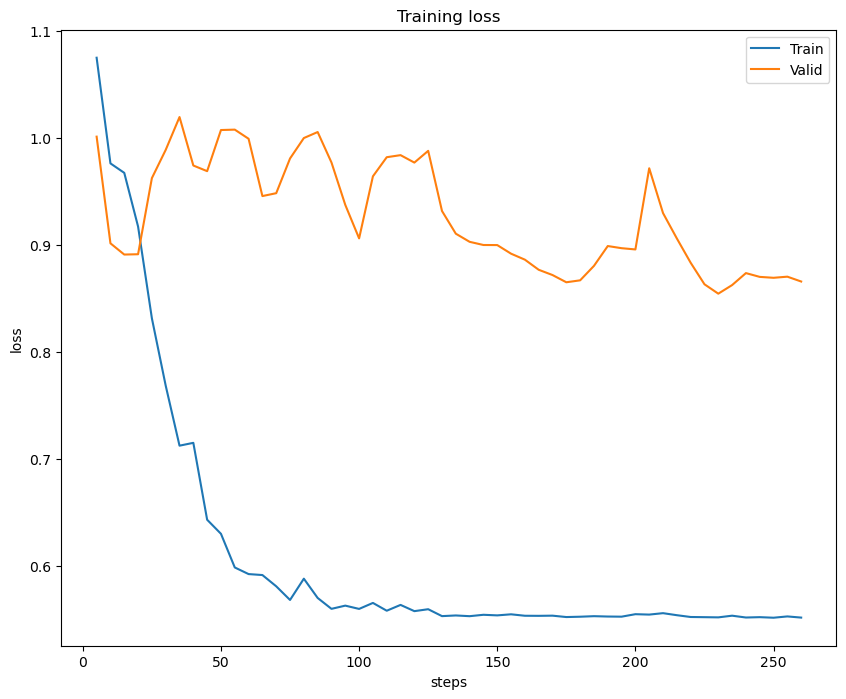

In [23]:
train_loss, valid_loss, steps = load_metrics('./data/bi_lstm_metrics.pt')
create_loss_plot(train_loss, valid_loss, steps)

2022-12-04 23:41:39,611 : model (148) - INFO - Loaded model from: ./data/bi_lstm.pt
2022-12-04 23:41:39,647 : evaluate (111) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.97      0.82        65
           2       0.85      0.38      0.52        29

    accuracy                           0.75       122
   macro avg       0.79      0.65      0.68       122
weighted avg       0.77      0.75      0.72       122



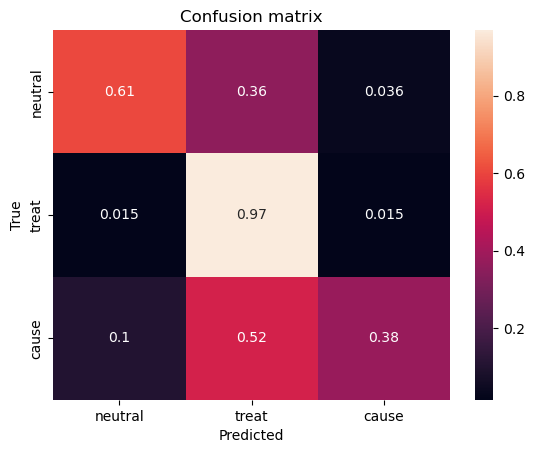

In [24]:
# load and evaluate best model
best_model = LSTM(588).to(device)

best_model.load('./data/bi_lstm.pt', device)
evaluate_lstm(best_model, test_loader, device=device)

## Discussion about LSTM Models
- The model showed a slighly improved accuracy in comparison to SVM baseline models from Milestone 1 
- Unfortunately just as baseline method it favores the treat class since it is overrepresented in the dataset.
- the performance of the LSTM was a lot better in comparison to the RNN models
- for the LSTM we included Softmax rescaling for the model which improved performance
- while the performance for the treat labels was great (0.97 acc) for cause labels it was low (0.38) and other false predictions were often predicted as "treat" labels

# Basic LSTM classifier

This is a basic LSTM classifier model which is used for multi class slassification problems. Unlike the fisrt bi-LSTM model presented, the basic LSTM's input flows only in one direction and it is only capable of utilizing information from one side. 

This model contains only a dropout layer to prevent overfitting,  an embedding layer to convert sentences to vectors, an LSTM layer to learn the features and finally a linear layer to map LSTM  features to three classes. 

In [25]:
import torch
from tuwnlpie.milestone2.model import LSTMClassifier
from scripts.evaluate import evaluate_lstm
from scripts.train import train_lstm
from tuwnlpie.milestone2.utils import load_metrics, create_loss_plot, get_loaders_lstm, prepare_dataset_lstm

In [27]:
model2 = LSTMClassifier(vocab_size=vocab_length).to(device)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01 )

In [32]:
train_lstm(model=model2, optimizer=optimizer2, num_epochs=15, train_loader=train_loader, valid_loader=valid_loader)

2022-12-04 23:43:11,172 : train (122) - INFO - Epoch [1/15], Step [5/65], Train Loss: 0.006, Valid Loss: 1.765
2022-12-04 23:43:11,175 : model (190) - INFO - Saved model to: ./data/bi_lstm.pt
2022-12-04 23:43:11,176 : utils (304) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2022-12-04 23:43:11,240 : train (122) - INFO - Epoch [1/15], Step [10/130], Train Loss: 0.006, Valid Loss: 1.763
2022-12-04 23:43:11,243 : model (190) - INFO - Saved model to: ./data/bi_lstm.pt
2022-12-04 23:43:11,244 : utils (304) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2022-12-04 23:43:11,321 : train (122) - INFO - Epoch [2/15], Step [15/195], Train Loss: 0.018, Valid Loss: 1.577
2022-12-04 23:43:11,323 : model (190) - INFO - Saved model to: ./data/bi_lstm.pt
2022-12-04 23:43:11,324 : utils (304) - INFO - Metrics saved to ./data/bi_lstm_metrics.pt
2022-12-04 23:43:11,379 : train (122) - INFO - Epoch [2/15], Step [20/260], Train Loss: 0.023, Valid Loss: 1.788
2022-12-04 23:43:11,450 : train (122)

2022-12-04 23:43:16,405 : utils (312) - INFO - Metrics loaded from: ./data/lstm_metrics.pt


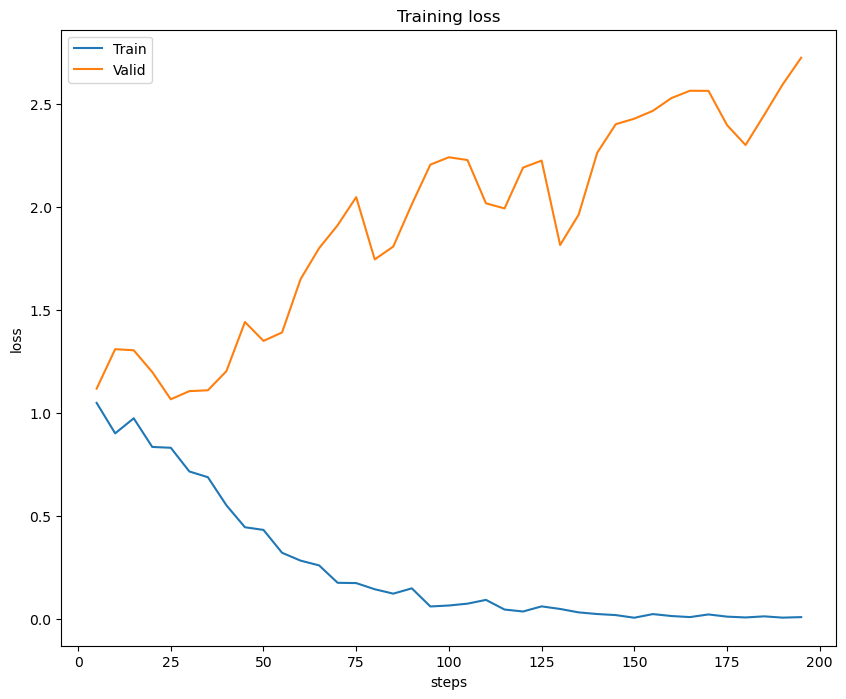

In [33]:
train_loss, valid_loss, steps = load_metrics('./data/lstm_metrics.pt')
create_loss_plot(train_loss, valid_loss, steps)

2022-12-04 23:44:13,966 : evaluate (111) - INFO - Classification report:


              precision    recall  f1-score   support

           0       0.27      0.54      0.36        28
           1       0.29      0.03      0.06        65
           2       0.36      0.72      0.48        29

    accuracy                           0.31       122
   macro avg       0.30      0.43      0.30       122
weighted avg       0.30      0.31      0.23       122



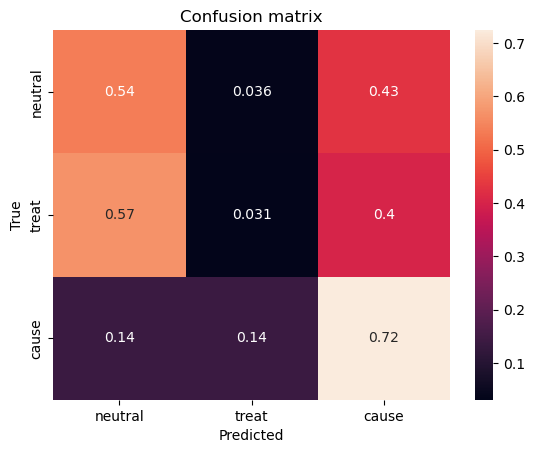

In [37]:
best_model = LSTMClassifier(588).to(device)
#best_model.load('./data/lstm.pt', device)
evaluate_lstm(best_model, test_loader)

Not as expected, this model did not perform better than the bi-directional LSTM. Still, the class with the highest accuracy prediction is the treat class, followed by the cause and finally the neutral class. This is somehow expected, as the same thing has happened in the other models, because of the data being imbalanced. 
Overcoming of the imbalanced dataset, may be treated as part of the future milestones, where methods soch as oversampling or undersampling the classes to have almost equally distributed classes among the dataset. 

# Simple baseline model using binary classification

**We also wanted to include a baseline approach for a binary classification. We used tensorflow package for this approach.**

In [ ]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 10.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ------------------------------------- 895.7/895.7 kB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 93.3/93.3 kB 

In [38]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

**Transforming data to binary (sentense: 0 not cause, 1 is_cause)**

In [39]:
df = pd.read_csv("./data/food_disease_dataset.csv")
df = df.drop(['Unnamed: 0','disease_entity', 'food_entity', 'disease_doid', 'is_treat'], axis=1)
df['is_cause'] = df['is_cause'].apply(np.int64)
df

,sentence,is_cause
0,"Interestingly, many Indian tribes use Bombax c...",0
1,Ultra-processed food consumption has been asso...,1
2,Salt has notoriously been blamed for causing a...,1
3,in broiler chicken flocks when animal-based me...,0
4,"In short, this study demonstrated that SFP cou...",0
...,...,...
603,"Thus, the inclusion of food sources of dietary...",0
604,Glasshouse pathogenicity tests with 'Reed' avo...,0
605,Intake of beverages with excess free fructose ...,1
606,"However, some evidence exists regarding a pote...",0


In [40]:
## this means any unknown words will be replaced by oov_token
tokenizer = Tokenizer(oov_token="<OOV>")

**we used 80% of data as training data, 20% for testing**

In [41]:
split = round(len(df)*0.8)
train_reviews = df['sentence'][:split]
train_label = df['is_cause'][:split]
test_reviews = df['sentence'][split:]
test_label = df['is_cause'][split:]

In [42]:
train_reviews

0      Interestingly, many Indian tribes use Bombax c...
1      Ultra-processed food consumption has been asso...
2      Salt has notoriously been blamed for causing a...
3      in broiler chicken flocks when animal-based me...
4      In short, this study demonstrated that SFP cou...
                             ...                        
481    The associations between specific types of nut...
482    Oregano oil was found to specifically inhibit ...
483    Fruit and vegetable intake has been associated...
484    Dietary Approaches to Stop Hypertension (DASH)...
485    In 2000, inhalation of butter flavoring vapors...
Name: sentence, Length: 486, dtype: object

**converting everything to string format to avoid having error later**

In [43]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [44]:
vocab_size = 40000 ##means we will take 40,000 unique words to train the network
embedding_dim = 16  ##means each word will be represented by a 16-dimensional vector
max_length = 50  ##Max_length 120 represents the length of each review
trunc_type = 'post' ##sentences will be truncated at the end when a sentence is bigger than 120 words
oov_tok = '<OOV>' ##if the sentence is less than 120 words it will be padded to make 120 words.
padding_type = 'post' ##padding_type ‘post’ means padding will be applied at the end, not in the beginning.

In [45]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [46]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [47]:
testing_padded

array([[   0,    0,    0, ...,    2, 2299,   12],
       [   0,    0,    0, ..., 1105,  462,  297],
       [   0,    0,    0, ...,   34,   12,  255],
       ...,
       [   0,    0,    0, ...,   67,    5,  155],
       [   0,    0,    0, ...,    1,  415,  142],
       [   0,    0,    0, ...,  398,  461,  462]])

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            640000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [50]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [51]:
num_epochs = 25
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/25
16/16 [==============================] - 1s 19ms/step - loss: 0.6893 - accuracy: 0.7222 - val_loss: 0.6825 - val_accuracy: 0.8361
Epoch 2/25
16/16 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.7490 - val_loss: 0.6649 - val_accuracy: 0.8361
Epoch 3/25
16/16 [==============================] - 0s 7ms/step - loss: 0.6643 - accuracy: 0.7490 - val_loss: 0.6398 - val_accuracy: 0.8361
Epoch 4/25
16/16 [==============================] - 0s 8ms/step - loss: 0.6458 - accuracy: 0.7490 - val_loss: 0.6143 - val_accuracy: 0.8361
Epoch 5/25
16/16 [==============================] - 0s 8ms/step - loss: 0.6280 - accuracy: 0.7490 - val_loss: 0.5877 - val_accuracy: 0.8361
Epoch 6/25
16/16 [==============================] - 0s 8ms/step - loss: 0.6094 - accuracy: 0.7490 - val_loss: 0.5622 - val_accuracy: 0.8361
Epoch 7/25
16/16 [==============================] - 0s 7ms/step - loss: 0.5922 - accuracy: 0.7490 - val_loss: 0.5351 - val_accuracy: 0.8361
Epoch 8/25
16/16 [=

<Figure size 640x480 with 0 Axes>

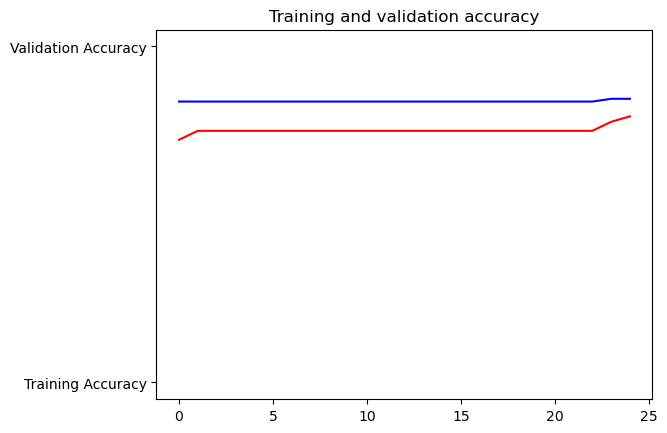

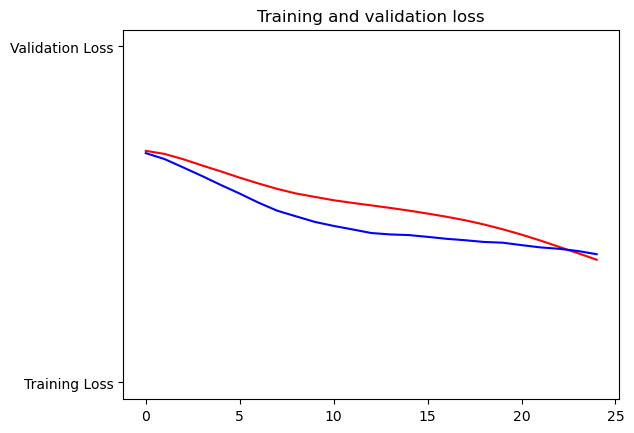

<Figure size 640x480 with 0 Axes>

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [53]:
new_sentence = ["Intake of beverages with excess free fructose (EFF), including apple juice, and HFCS sweetened fruit drinks and soft drinks",
                "Salt has notoriously been blamed for causing an increase in the urinary excretion of calcium, and thus is a considered a risk factor for osteoporosis.",
                "in broiler chicken flocks when animal-based measures related to footpad dermatitis, hock burns, body lesions and arthritis are identified under commercial conditions (high density).",
                "In short, this study demonstrated that SFP could be developed as functional foods or pharmaceutical supplements for the prevention or mitigation of diabetes and its complications.",
                "Wheat is one of the five most common foods that trigger allergic reactions in children."
                ]
new_sequences = tokenizer.texts_to_sequences(new_sentence)
# padding the new sequences to make them have same dimensions
new_padded = pad_sequences(new_sequences, maxlen = max_length,
                           padding = padding_type,
                           truncating = trunc_type)

new_padded = np.array(new_padded)

In [54]:
print(model.predict(new_padded))

1/1 [==============================] - 0s 66ms/step
[[0.23417403]
 [0.3712621 ]
 [0.20525132]
 [0.15732762]
 [0.45091558]]


## Discussion for baseline NN model using binary classification

### General Remarks
This model is straight forward NN, made for general purpose use and we used 80% of our dataset as input, thus we can summarize our baseline model as follows:

### strengths 
1.   easy to use and straight forward model, with 1 hidden layer with 6 dimensions
2.   Light weight as we can infere with low latency

### weaknesses


1.   Higher Accuracy on test dataset, but when we infer with new input we don't get good prediction power 
2.   Doesn't exctract full relation from the sentences as it gets good prediction from short sentences only.

